In [17]:
import sys
sys.path.append('/home/james/Dropbox (MIT)/All_Resourceful/dag_planner/dag-plan')
from app.views import solve_LP
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import random
import math

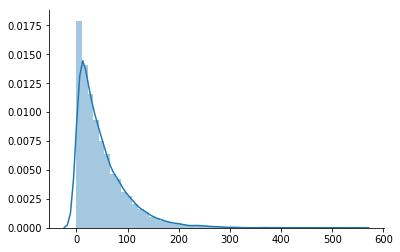

In [13]:
def jump_time(mean_val):
    return random.expovariate(1./mean_val)
sns.distplot([jump_time(50) for _ in range(10000)])
sns.despine()

[0.951229424500714, 0.0475614712250357, 0.0011890367806258924, 1.9817279677098206e-05, 2.4771599596372754e-07, 2.477159959637275e-09, 2.0642999663643957e-11, 1.4744999759745683e-13, 9.215624849841051e-16, 5.1197915832450276e-18]


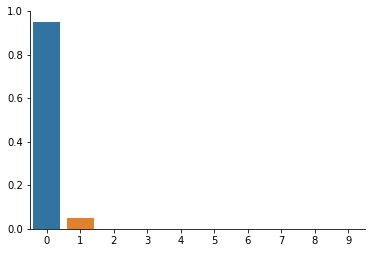

In [33]:
def poisson_pmf(mean_per_unittime, t, numevents):
    r = mean_per_unittime
    return ((r*t)**numevents)*math.exp(-r*t)/math.factorial(numevents)
t= 1e-6
mean_per = 50000
pmf = [poisson_pmf(mean_per, t, i) for i in range(10)]
print(pmf)
sns.barplot(list(range(10)),pmf )
sns.despine()

In [2]:
times = [i*12 for i in range(7)]
def poisson_march(oldvalue, p):
    
def px_evolver(px):
    """px evolves according to a poisson march"""
def timestepper()

In [82]:
rssi = {0:{31:-30}, 31:{0:-30}}
def p(i):
    return {0:1,31:i}
code = """class SenseReduce:
    def __init__(self):
        self.sensenodes = [[31]]
        self.mapnodes = [[31,0]]
        self.reducenodes = [[31,0]]
        self.l={}
    def sampler(self,node):
        acc = yield from node.testaccel({})
        return (node.ID,acc['x'])
    def mapper(self,node,d):
        for i in range(4):
            fts = np.fft(d[1])
        c = lambda d: (d.real,d.imag)
        sort = lambda fts: sorted(enumerate(fts), key=lambda x: abs(x[1]), reverse=True)[0:224]
        largest_idxs= [(i[0], c(i[1])) for i in sort(fts)]
        yield(0,largest_idxs)
    def reducer(self,node,k,vs):
        yield(k,vs)"""
code1 = """class SenseReduce:
    def __init__(self):
        self.sensenodes = [[31]]
        self.mapnodes = [[31]]
        self.reducenodes = [[31,0]]
        self.l={}
    def sampler(self,node):
        acc = yield from node.testaccel({})
        return (node.ID,acc['x'])
    def mapper(self,node,d):
        for i in range(4):
            fts = np.fft(d[1])
        c = lambda d: (d.real,d.imag)
        sort = lambda fts: sorted(enumerate(fts), key=lambda x: abs(x[1]), reverse=True)[0:224]
        largest_idxs= [(i[0], c(i[1])) for i in sort(fts)]
        yield(0,largest_idxs)
    def reducer(self,node,k,vs):
        yield(k,vs)"""
code2 = """class SenseReduce:
    def __init__(self):
        self.sensenodes = [[31]]
        self.mapnodes = [[0]]
        self.reducenodes = [[31,0]]
        self.l={}
    def sampler(self,node):
        acc = yield from node.testaccel({})
        return (node.ID,acc['x'])
    def mapper(self,node,d):
        for i in range(4):
            fts = np.fft(d[1])
        c = lambda d: (d.real,d.imag)
        sort = lambda fts: sorted(enumerate(fts), key=lambda x: abs(x[1]), reverse=True)[0:224]
        largest_idxs= [(i[0], c(i[1])) for i in sort(fts)]
        yield(0,largest_idxs)
    def reducer(self,node,k,vs):
        yield(k,vs)"""
def run3(f):
    def runner(*args,**kw):
        res = [f(*args,**kw)['totaltime'] for i in range(3)]
        print('res: ',res)
        return sum(res)/len(res)
    return runner
def get_all(code,rssi):
    #speeds = [0.00000250,0.00000500,0.00000750, 0.00001000, 0.00001250, 0.00001500, 0.00001750] 
    speeds = [0.05*0.07,0.25*0.07, 0.5*0.07,0.75*0.07,0.07]
    res = [(i,run3(solve_LP)(code, rssi=rssi, proc = p(i)) )
           for i in speeds]
    return [(i[0],i[1]) for i in res]
ranger = get_all(code1.format(512,512),rssi)
ranger2 = get_all(code2.format(512,512),rssi)
ranger_opt = get_all(code.format(512,512), rssi)

opening:  /home/james/Dropbox (MIT)/All_Resourceful/dag_planner/dag-plan/app/192.168.123.99.json
weights:  {'M': {0: {'edge': {0: 10933}, 'cost': 22.323999999997568}}, 'S': {0: {'edge': {0: 10995}, 'cost': 260.5341744111785}}, 'R': {0: {'edge': {0: 10935}, 'cost': 0.01100000000064938}}}
opening:  /home/james/Dropbox (MIT)/All_Resourceful/dag_planner/dag-plan/app/192.168.123.99.json
weights:  {'M': {0: {'edge': {0: 10933}, 'cost': 21.85300000002144}}, 'S': {0: {'edge': {0: 10995}, 'cost': 256.3233147537314}}, 'R': {0: {'edge': {0: 10935}, 'cost': 0.010000000003174137}}}
rssi graph:  {0: {31: -30}, 31: {0: -30}}
prob success:  0.9899999132339502
time per try:  580 num_tries:  1.01010109862877
time per byte:  14.646465930117166
prob success:  0.9899999132339502
time per try:  580 num_tries:  1.01010109862877
time per byte:  14.646465930117166
trying to solve
opening:  /home/james/Dropbox (MIT)/All_Resourceful/dag_planner/dag-plan/app/192.168.123.99.json
weights:  {'M': {0: {'edge': {0: 10

weights:  {'M': {0: {'edge': {0: 10933}, 'cost': 20.799000000010892}}, 'S': {0: {'edge': {0: 10995}, 'cost': 257.53445475650454}}, 'R': {0: {'edge': {0: 10935}, 'cost': 0.01499999999055035}}}
rssi graph:  {0: {31: -30}, 31: {0: -30}}
prob success:  0.9899999132339502
time per try:  580 num_tries:  1.01010109862877
time per byte:  14.646465930117166
prob success:  0.9899999132339502
time per try:  580 num_tries:  1.01010109862877
time per byte:  14.646465930117166
trying to solve
opening:  /home/james/Dropbox (MIT)/All_Resourceful/dag_planner/dag-plan/app/192.168.123.99.json
weights:  {'M': {0: {'edge': {0: 10933}, 'cost': 21.747000000004846}}, 'S': {0: {'edge': {0: 10995}, 'cost': 257.07022052596614}}, 'R': {0: {'edge': {0: 10935}, 'cost': 0.01100000000064938}}}
opening:  /home/james/Dropbox (MIT)/All_Resourceful/dag_planner/dag-plan/app/192.168.123.99.json
weights:  {'M': {0: {'edge': {0: 10933}, 'cost': 21.04899999997656}}, 'S': {0: {'edge': {0: 10995}, 'cost': 257.79387845535007}}, 

weights:  {'M': {0: {'edge': {0: 10933}, 'cost': 21.652999999986378}}, 'S': {0: {'edge': {0: 10995}, 'cost': 257.4572083158858}}, 'R': {0: {'edge': {0: 10935}, 'cost': 0.011999999998124622}}}
opening:  /home/james/Dropbox (MIT)/All_Resourceful/dag_planner/dag-plan/app/192.168.123.99.json
weights:  {'M': {0: {'edge': {0: 10933}, 'cost': 21.158000000014}}, 'S': {0: {'edge': {0: 10995}, 'cost': 259.64318449830665}}, 'R': {0: {'edge': {0: 10935}, 'cost': 0.022999999998774}}}
rssi graph:  {0: {31: -30}, 31: {0: -30}}
prob success:  0.9899999132339502
time per try:  580 num_tries:  1.01010109862877
time per byte:  14.646465930117166
prob success:  0.9899999132339502
time per try:  580 num_tries:  1.01010109862877
time per byte:  14.646465930117166
trying to solve
opening:  /home/james/Dropbox (MIT)/All_Resourceful/dag_planner/dag-plan/app/192.168.123.99.json
weights:  {'M': {0: {'edge': {0: 10933}, 'cost': 21.642999999983203}}, 'S': {0: {'edge': {0: 10995}, 'cost': 260.2338741479362}}, 'R': 

weights:  {'M': {0: {'edge': {0: 10933}, 'cost': 21.51800000001458}}, 'S': {0: {'edge': {0: 10995}, 'cost': 256.5844326348545}}, 'R': {0: {'edge': {0: 10935}, 'cost': 0.010000000003174137}}}
rssi graph:  {0: {31: -30}, 31: {0: -30}}
prob success:  0.9899999132339502
time per try:  580 num_tries:  1.01010109862877
time per byte:  14.646465930117166
prob success:  0.9899999132339502
time per try:  580 num_tries:  1.01010109862877
time per byte:  14.646465930117166
trying to solve
opening:  /home/james/Dropbox (MIT)/All_Resourceful/dag_planner/dag-plan/app/192.168.123.99.json
weights:  {'M': {0: {'edge': {0: 10933}, 'cost': 21.194999999977426}}, 'S': {0: {'edge': {0: 10995}, 'cost': 258.14418671583724}}, 'R': {0: {'edge': {0: 10935}, 'cost': 0.010000000003174137}}}
opening:  /home/james/Dropbox (MIT)/All_Resourceful/dag_planner/dag-plan/app/192.168.123.99.json
weights:  {'M': {0: {'edge': {0: 10933}, 'cost': 21.166999999991276}}, 'S': {0: {'edge': {0: 10995}, 'cost': 260.1192672993823}}, 

weights:  {'M': {0: {'edge': {0: 10933}, 'cost': 21.726000000001022}}, 'S': {0: {'edge': {0: 10995}, 'cost': 260.4391144474194}}, 'R': {0: {'edge': {0: 10935}, 'cost': 0.009000000005698894}}}
opening:  /home/james/Dropbox (MIT)/All_Resourceful/dag_planner/dag-plan/app/192.168.123.99.json
weights:  {'M': {0: {'edge': {0: 10933}, 'cost': 21.156999999988102}}, 'S': {0: {'edge': {0: 10995}, 'cost': 256.74757623984675}}, 'R': {0: {'edge': {0: 10935}, 'cost': 0.01100000000064938}}}
rssi graph:  {0: {31: -30}, 31: {0: -30}}
prob success:  0.9899999132339502
time per try:  580 num_tries:  1.01010109862877
time per byte:  14.646465930117166
prob success:  0.9899999132339502
time per try:  580 num_tries:  1.01010109862877
time per byte:  14.646465930117166
trying to solve
res:  [160995.42257203057, 160984.7451615699, 160991.0782344962]
opening:  /home/james/Dropbox (MIT)/All_Resourceful/dag_planner/dag-plan/app/192.168.123.99.json
weights:  {'M': {0: {'edge': {0: 10933}, 'cost': 21.9220000000177

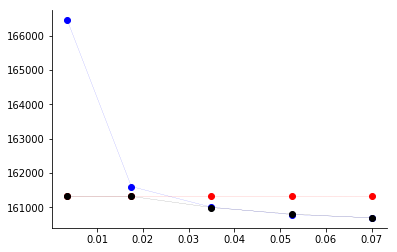

In [83]:
fig, ax = plt.subplots(1)
ax.plot([x[0] for x in ranger], [y[1] for y in ranger], c='b', linewidth=0.1, marker='o')
ax.plot([x[0] for x in ranger2], [y[1] for y in ranger2], c='r',linewidth=0.1, marker='o')
ax.plot([x[0] for x in ranger2], [y[1] for y in ranger_opt], c='k',linewidth=0.1, marker='o')
sns.despine()